In [1]:
import pandas
import numpy
raw = pandas.DataFrame.from_csv('P+N_DATA.csv')
train=raw.transpose()
train=raw.transpose()
for col in train.columns.values:
    for i in train.index.values:
        if(train[col][i]>0):
            train.set_value(i,col,1)
X=train.iloc[0:262, 0:4346]
Y=train['YCOMPLETE']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

clf = GaussianNB()
clf = clf.fit(X_train, y_train)
predictions=numpy.array(clf.predict(X_test))
f1_score=f1_score(y_test,predictions)
f1_score

0.43478260869565216

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

clf = MultinomialNB()
clf = clf.fit(X_train, y_train)
predictions=numpy.array(clf.predict(X_test))
f1_score=f1_score(y_test,predictions)
f1_score

0.64285714285714279

In [4]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

clf = BernoulliNB()
clf = clf.fit(X_train, y_train)
predictions=numpy.array(clf.predict(X_test))
f1_score=f1_score(y_test,predictions)
f1_score

0.79999999999999993

In [5]:
X_train.shape

(196, 4346)

In [6]:
count=pandas.DataFrame(clf.feature_count_,columns=list(X_train.columns.tolist()),index=['0_count','1_count'])
support=pandas.DataFrame(numpy.zeros([4346,1]),index=list(X_train.columns.tolist()),columns=['support'])
for header in list(X_train.columns.tolist()):
    support.set_value(header,'support',(count[header]['0_count']+count[header]['1_count'])/196)
support

,support
COG0001,0.219388
COG0002,0.239796
COG0003,0.030612
COG0004,0.214286
COG0005,0.198980
COG0006,0.290816
COG0007,0.198980
COG0008,0.301020
COG0009,0.224490
COG0010,0.147959


In [7]:
posterior=pandas.DataFrame(numpy.exp(clf.feature_log_prob_),columns=list(X_train.columns.tolist()),index=['0_posterior','1_posterior'])
posterior

,COG0001,COG0002,COG0003,COG0004,COG0005,COG0006,COG0007,COG0008,COG0009,COG0010,...,COG5652,COG5653,COG5654,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5665
0_posterior,0.122699,0.128834,0.018405,0.128834,0.104294,0.171779,0.104294,0.177914,0.104294,0.110429,...,0.030675,0.024540,0.024540,0.006135,0.073620,0.006135,0.018405,0.030675,0.024540,0.006135
1_posterior,0.675676,0.756757,0.135135,0.621622,0.648649,0.837838,0.648649,0.864865,0.783784,0.351351,...,0.162162,0.027027,0.081081,0.189189,0.054054,0.081081,0.054054,0.081081,0.027027,0.054054


In [8]:
prior=pandas.DataFrame(numpy.exp(clf.class_log_prior_),columns=['prior'])
prior

,prior
0,0.821429
1,0.178571


In [9]:
conditional=pandas.DataFrame(numpy.zeros([4346,2]),index=list(X_train.columns.tolist()))
for header in list(X_train.columns.tolist()):
    if(support['support'][header]==0):
        conditional.set_value(header,0,0)
        conditional.set_value(header,1,0)
    else:
        conditional.set_value(header,0,posterior[header]['0_posterior'] * prior['prior'][0]/support['support'][header])
        conditional.set_value(header,1,posterior[header]['1_posterior'] * prior['prior'][1]/support['support'][header])
conditional

,0,1
COG0001,0.459409,0.549969
COG0002,0.441326,0.563542
COG0003,0.493865,0.788288
COG0004,0.493865,0.518018
COG0005,0.430549,0.582121
COG0006,0.485201,0.514462
COG0007,0.430549,0.582121
COG0008,0.485494,0.513055
COG0009,0.381623,0.623464
COG0010,0.613074,0.424045


In [10]:
conditional.join(support).join(count.transpose()).join(posterior.transpose())

,0,1,support,0_count,1_count,0_posterior,1_posterior
COG0001,0.459409,0.549969,0.219388,19.0,24.0,0.122699,0.675676
COG0002,0.441326,0.563542,0.239796,20.0,27.0,0.128834,0.756757
COG0003,0.493865,0.788288,0.030612,2.0,4.0,0.018405,0.135135
COG0004,0.493865,0.518018,0.214286,20.0,22.0,0.128834,0.621622
COG0005,0.430549,0.582121,0.198980,16.0,23.0,0.104294,0.648649
COG0006,0.485201,0.514462,0.290816,27.0,30.0,0.171779,0.837838
COG0007,0.430549,0.582121,0.198980,16.0,23.0,0.104294,0.648649
COG0008,0.485494,0.513055,0.301020,28.0,31.0,0.177914,0.864865
COG0009,0.381623,0.623464,0.224490,16.0,28.0,0.104294,0.783784
COG0010,0.613074,0.424045,0.147959,17.0,12.0,0.110429,0.351351


In [11]:
clf.coef_

array([[-0.39204209, -0.2787134 , -2.00148   , ..., -2.51230562,
        -3.61091791, -2.91777073]])

In [12]:
clf.feature_log_prob_

array([[-2.09801793, -2.04922776, -3.99513791, ..., -3.48431229,
        -3.70745584, -5.0937502 ],
       [-0.39204209, -0.2787134 , -2.00148   , ..., -2.51230562,
        -3.61091791, -2.91777073]])

In [13]:
coef = pandas.DataFrame(numpy.exp(clf.coef_),columns=list(X_train.columns.tolist())).transpose()
coef

,0
COG0001,0.675676
COG0002,0.756757
COG0003,0.135135
COG0004,0.621622
COG0005,0.648649
COG0006,0.837838
COG0007,0.648649
COG0008,0.864865
COG0009,0.783784
COG0010,0.351351


Populating the interactive namespace from numpy and matplotlib


C:\Users\rub account\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


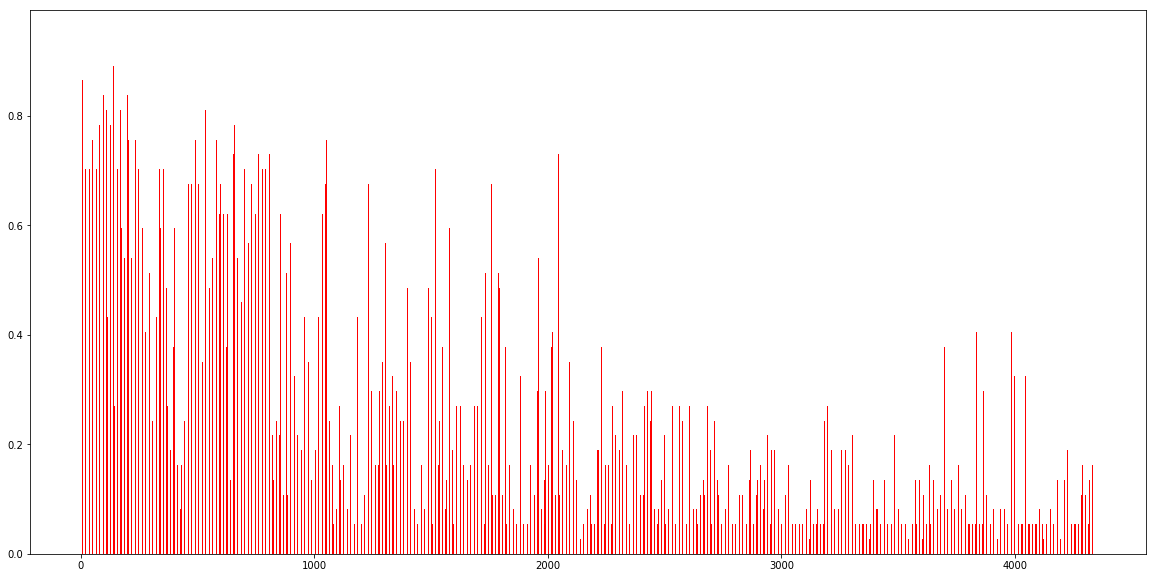

In [14]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)
heights = list(coef[0].tolist())

ind = numpy.arange(4346)  # the x locations for the groups
width = 0.35       # the width of the bars

plt.bar(ind,heights, width, color='r')
plt.show()

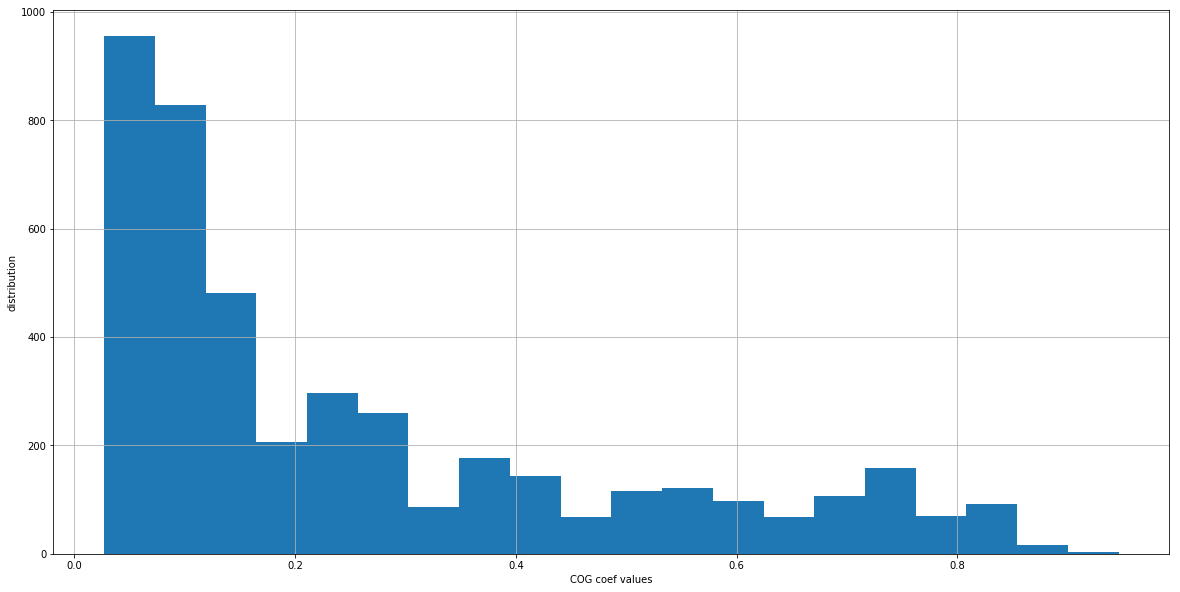

In [15]:
plt.hist(heights,20)
plt.xlabel('COG coef values')
plt.ylabel('distribution')
plt.grid(True)
plt.show()